In [110]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import numpy as np
PLOT_FOLDER = "../data/raw/plots/filmseries/"
PLOT_FOLDER_REVENUE = "../data/raw/plots/filmseriesrevenue/"

In [111]:
# loading file
df = pd.read_csv('../data/processed/movie_stats/movie_stats.csv')

In [112]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue
0,0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133
1,1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302
2,2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111
3,3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039
4,4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180


In [113]:
# # filtering out movies before 2017
# df = df[df['release_date'] >= '2017-01-01']

In [114]:
# getting all the cast columns and convert to list
cast_cols = df["cast"].tolist()

# getting all movies revenue and convert to list
revenue_cols = df["movie_revenue"].tolist()


In [115]:
percentages = []
revenues = []

casts = [re.findall(r"'([^,]*?)':", cast) for cast in cast_cols]
print(casts[0])


['Brie Larson', 'Teyonah Parris', 'Iman Vellani', 'Zawe Ashton', 'Park Seo-jun', 'Samuel L. Jackson', 'Gary Lewis', 'Zenobia Shroff', 'Mohan Kapur', 'Saagar Shaikh', 'Lashana Lynch', 'Leila Farzad', 'Abraham Popoola', 'Daniel Ings', 'Kya Garwood', 'Tessa Thompson', 'Hailee Steinfeld', 'Kelsey Grammer', 'Akira Akbar', 'Jude Law', 'Annette Bening']


In [116]:
# getting a set of top actors 
actors = set()
TOP = 30

for cast in casts:
    for i in range(min(TOP, len(cast) - 1)):
        actors.add(cast[i])

actors = list(actors)
print(actors)
print(len(actors))

['Tuwaine Barrett', 'Mads Mikkelsen', 'Michelle Pfeiffer', 'Meera Syal', 'Julian Bleach', 'Kevin Foster', 'Aaron Himelstein', 'Toni Garrn', 'Joseph Gatt', 'Cohen Holloway', 'Ryan Kiera Armstrong', 'Marcello Walton', 'Gwyneth Paltrow', 'Irma Estella La Guerre', 'Sope Aluko', 'Kylen Davis', 'Salma Hayek Pinault', 'Iman Vellani', 'Anjana Vasan', 'Evangeline Lilly', 'Laura Harrier', 'David Bradley', 'Hemky Madera', 'Daniel Ings', 'Nelson Franklin', 'Lauren Ridloff', 'Evan Jones', 'Dallas Liu', 'Guy Pearce', 'Tomas Arana', 'Joshua Harto', 'Gene Farber', 'Patton Oswalt', 'Rudy Eisenzopf', 'Judy Greer', 'Stellan Skarsgård', 'Zachary Levi', 'Bridget Hoffman', 'Patrick Brennan', 'Pom Klementieff', 'John Kani', 'Spencer Wilding', 'Jasper Bagg', 'Christopher Markus', 'Marielle Scott', 'Talulah Riley', 'Ana Ayora', 'Thomas Haden Church', 'Jerzy Skolimowski', 'Mckenna Grace', 'John Slattery', 'Luke Cook', 'Sarah Alami', 'Clark Gregg', 'Abraham Popoola', 'Elizabeth Debicki', 'Jamie Foxx', 'Jeremy Re

In [117]:
# building a vector for each movie
cast_vectors = []

for cast in casts:
    cast_vector = np.zeros(len(actors))
    
    for i in range(len(cast)):
        actor = cast[i]

        if actor in actors:
            score = 1
            cast_vector[actors.index(actor)] = score
    
    cast_vectors.append(cast_vector)
cast_vectors = np.array(cast_vectors)

In [118]:
cast_vectors[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

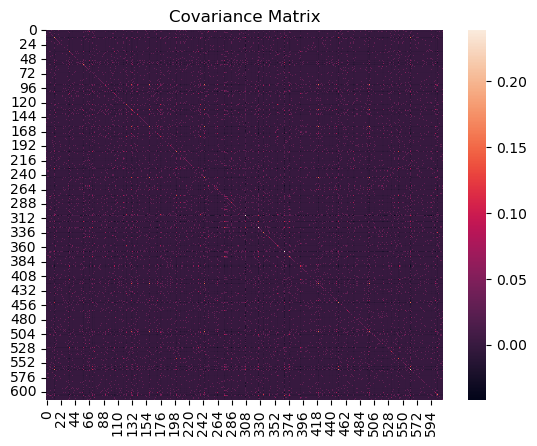

In [119]:
# making a covariance plot
import seaborn as sns

cov = np.cov(cast_vectors.T)
sns.heatmap(cov)
plt.title('Covariance Matrix')
plt.savefig(PLOT_FOLDER + "/covariance.png")
plt.show()


/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

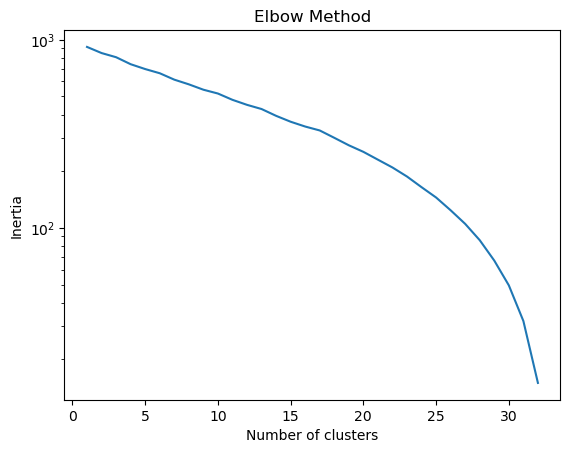

In [120]:
# applying k-means clustering and make elbow plot
from sklearn.cluster import KMeans

inertia = []
to = len(cast_vectors)
for i in range(1, to):
    # using the hamming distance
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cast_vectors)
    inertia.append(kmeans.inertia_)
    

plt.plot(range(1, to), inertia)
plt.title('Elbow Method')
# logaritmic scale on y axis
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig(PLOT_FOLDER + "/elbow.png")
plt.show()


/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_69200/2520878468.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, method='complete')


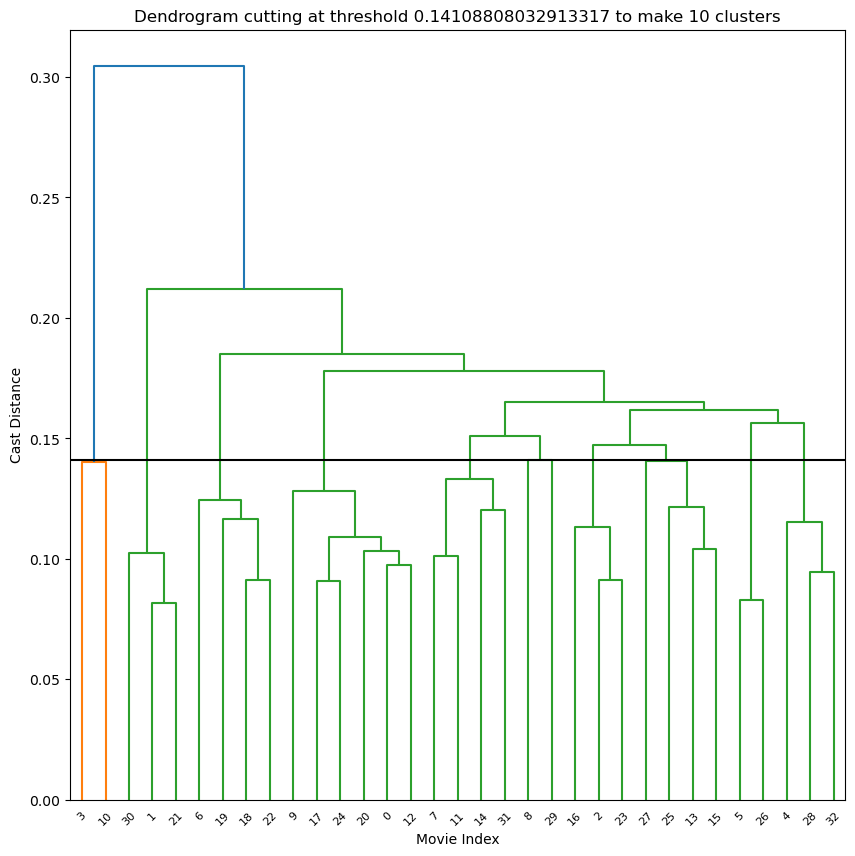

In [121]:
# trying with hiararchical clustering using hamming distance
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# using the hamming distance
dist = pairwise_distances(cast_vectors, metric='hamming')
link = linkage(dist, method='complete')

number_of_clusters = 10

max_d = 0
for i in range(len(link) + 1 - number_of_clusters):
    max_d = max(max_d, link[i][2])

# getting the clusters
clusters = {}
for i in range(len(link) + 1):
    clusters[i] = [i]

# ploting a threshold line based on max_d to make number_of_clusters clusters
plt.figure(figsize=(10, 10))
dendrogram(link , orientation='top')
plt.axhline(y=max_d, c='k')
plt.title('Dendrogram cutting at threshold ' + str(max_d) + ' to make ' + str(number_of_clusters) + ' clusters')
plt.xlabel('Movie Index')
plt.ylabel('Cast Distance')
plt.savefig(PLOT_FOLDER + "/dendrogram_threshold.png")
plt.show()


In [128]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(link, max_d, criterion='distance')
# print(clusters)

# getting the movies in each cluster
movies_in_clusters = {}
for i in range(len(clusters)):
    movie_title = df.iloc[i]['movie_name']
    cluster = clusters[i]
    if cluster in movies_in_clusters:
        movies_in_clusters[cluster].append(movie_title)
    else:
        movies_in_clusters[cluster] = [movie_title]

# printing the movies in each cluster
for cluster in movies_in_clusters:
    print('Cluster ' + str(cluster) + ':')
    print(movies_in_clusters[cluster])
    print('')

# getting the relative distance between clusters
cluster_distances = {}


# loading annotated file
df = pd.read_csv('../data/processed/movie_stats/movie_stats_annotated.csv')

# appending the cluster column to df
df['film_series_cluster'] = clusters
# df.head()
df.to_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index=False)

Cluster 4:
['Iron Man', 'Guardians of the Galaxy', 'Captain America: Civil War', 'Black Panther', 'Captain Marvel', 'Shang-Chi and the Legend of the Ten Rings']

Cluster 2:
['The Incredible Hulk', 'Avengers: Endgame', 'Ant-Man and the Wasp: Quantumania']

Cluster 7:
['Iron Man 2', 'Thor: Ragnarok', 'Black Widow']

Cluster 1:
['Thor', 'Avengers: Age of Ultron']

Cluster 10:
['Captain America: The First Avenger', 'Thor: Love and Thunder', 'The Marvels']

Cluster 9:
['The Avengers', 'Spider-Man: No Way Home']

Cluster 3:
['Iron Man 3', 'Avengers: Infinity War', 'Ant-Man and the Wasp', 'Spider-Man: Far From Home']

Cluster 5:
['Thor: The Dark World', 'Ant-Man', 'Guardians of the Galaxy Vol. 2', 'Guardians of the Galaxy Vol. 3']

Cluster 6:
['Captain America: The Winter Soldier', 'Black Panther: Wakanda Forever']

Cluster 8:
['Doctor Strange', 'Spider-Man: Homecoming', 'Eternals', 'Doctor Strange in the Multiverse of Madness']

[[ 1.         21.          0.08164759  2.        ]
 [ 5.       

In [123]:
# sorting df based on release date ascending
df = df.sort_values(by=['release_date'], ascending=True)

In [124]:
# extracting the clusters from df
clusters = df['film_series_cluster'].tolist()

In [125]:
film_series_sorted = {}


for movie in df.to_dict('records'):
    film_series = movie["film_series_cluster"]
    
    movie_tuple = (movie["movie_name"], movie["movie_revenue"])
    if film_series in film_series_sorted:
        film_series_sorted[film_series].append(movie_tuple)
    else:
        film_series_sorted[film_series] = [movie_tuple]

film_series_sorted


{8: [('Iron Man', 585174222),
  ('The Incredible Hulk', 163712074),
  ('Iron Man 2', 623933331),
  ('Iron Man 3', 1215577205)],
 3: [('Thor', 449326618),
  ('Thor: The Dark World', 644783140),
  ('Thor: Ragnarok', 855301806),
  ('Thor: Love and Thunder', 760928081)],
 6: [('Captain America: The First Avenger', 370569774),
  ('Captain Marvel', 1131416446)],
 5: [('The Avengers', 1518815515),
  ('Captain America: The Winter Soldier', 714766572),
  ('Avengers: Age of Ultron', 1405403694),
  ('Captain America: Civil War', 1155046416)],
 2: [('Guardians of the Galaxy', 772776600),
  ('Guardians of the Galaxy Vol. 2', 863756051),
  ('Guardians of the Galaxy Vol. 3', 845430302)],
 10: [('Ant-Man', 519311965),
  ('Ant-Man and the Wasp', 622674139),
  ('Ant-Man and the Wasp: Quantumania', 476071180)],
 4: [('Doctor Strange', 676343174),
  ('Black Widow', 379751131),
  ('Shang-Chi and the Legend of the Ten Rings', 432243292),
  ('Eternals', 402064899),
  ('Doctor Strange in the Multiverse of Mad

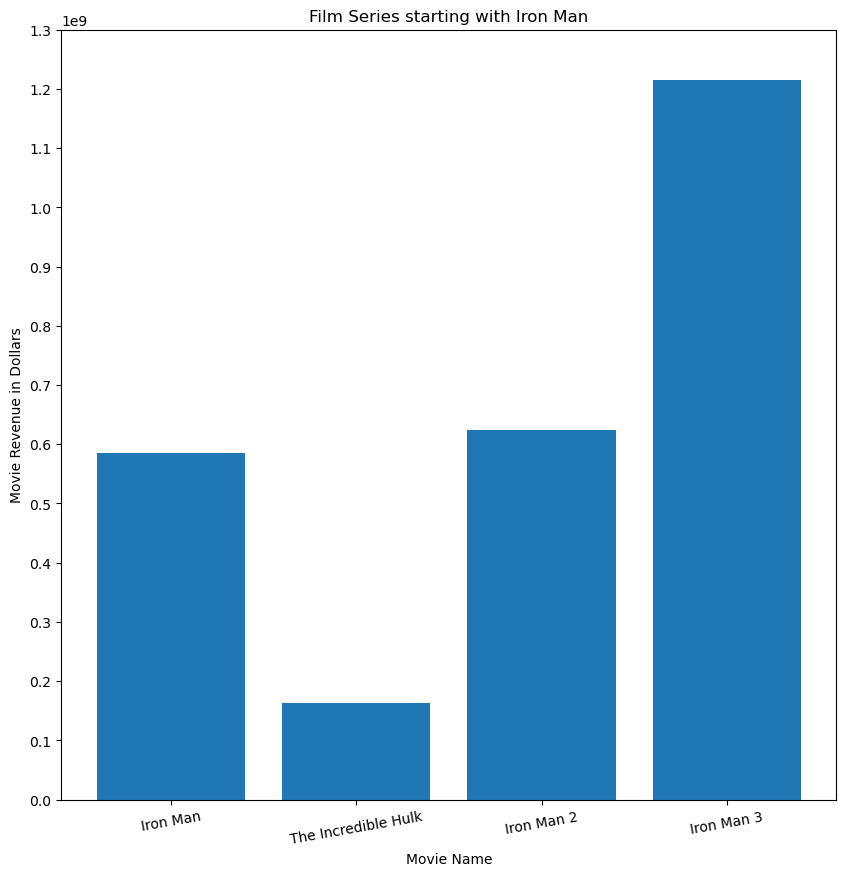

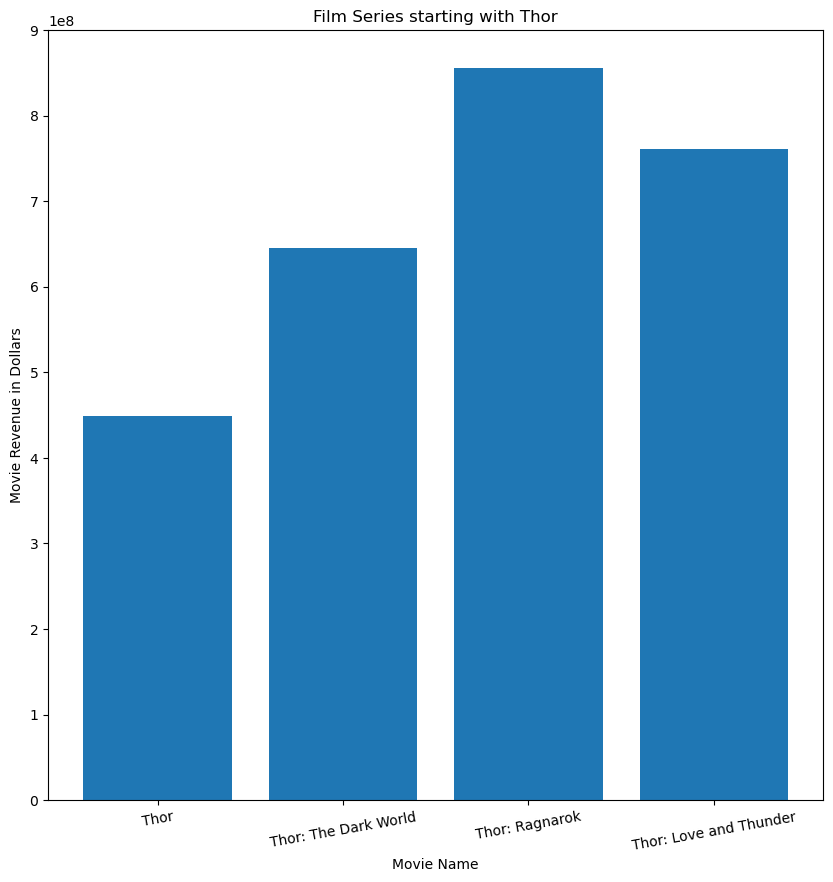

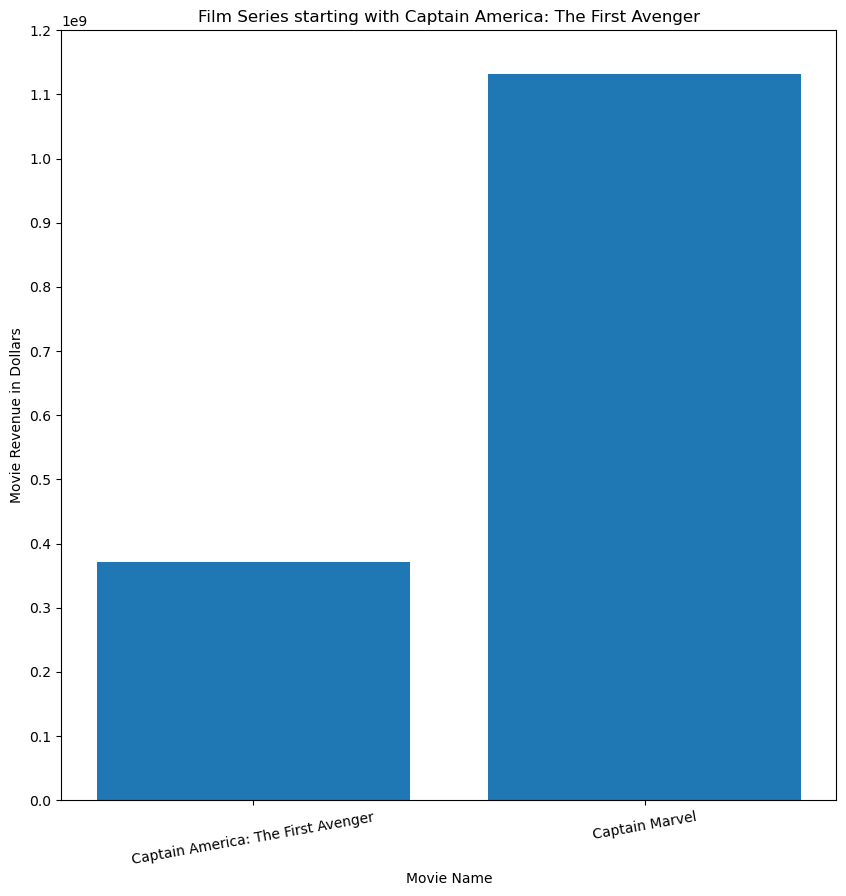

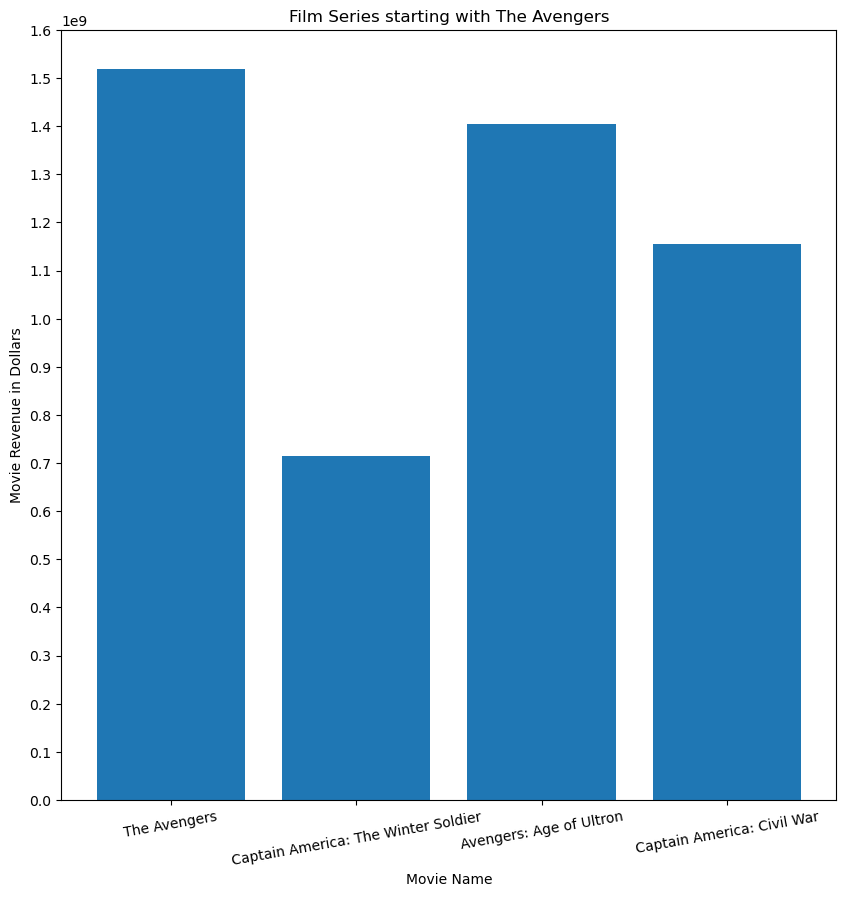

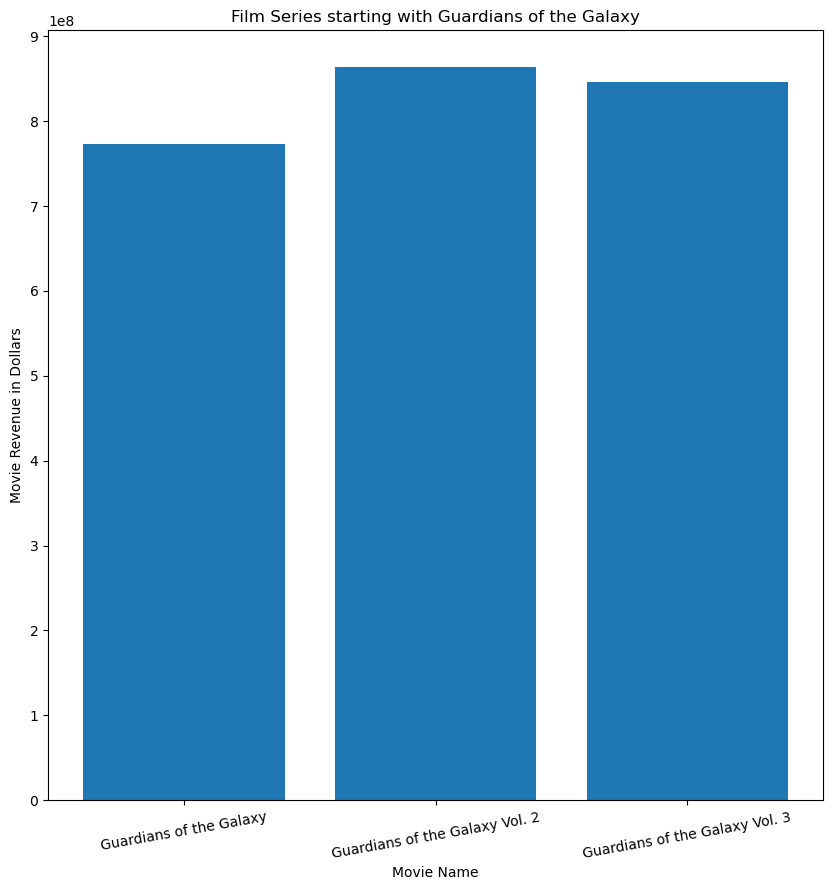

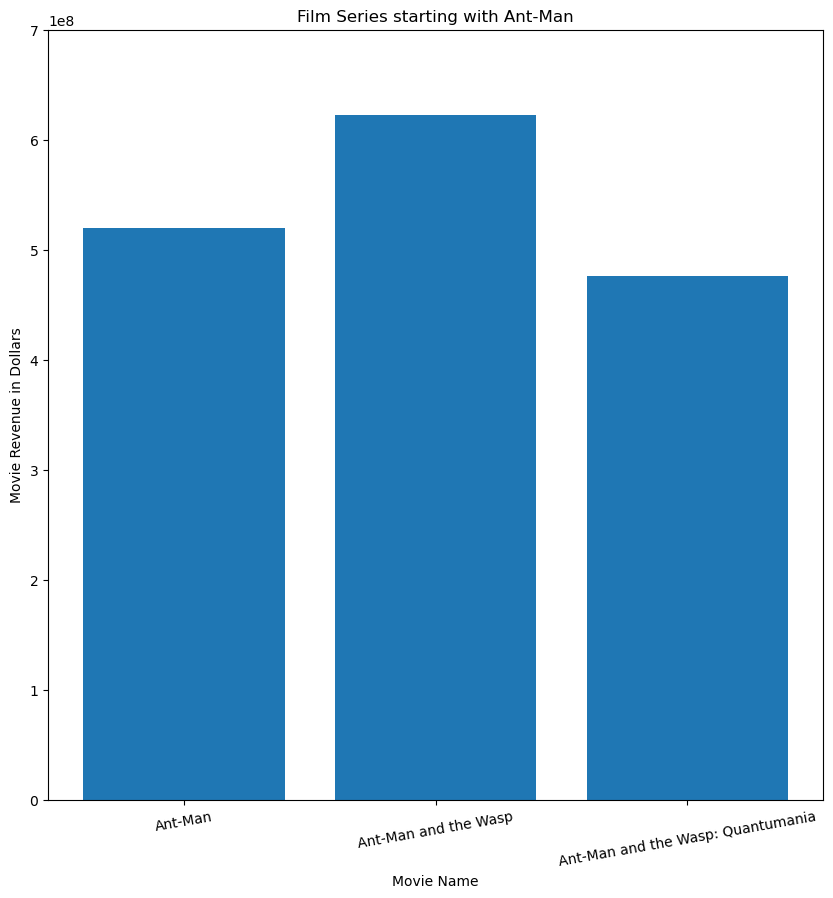

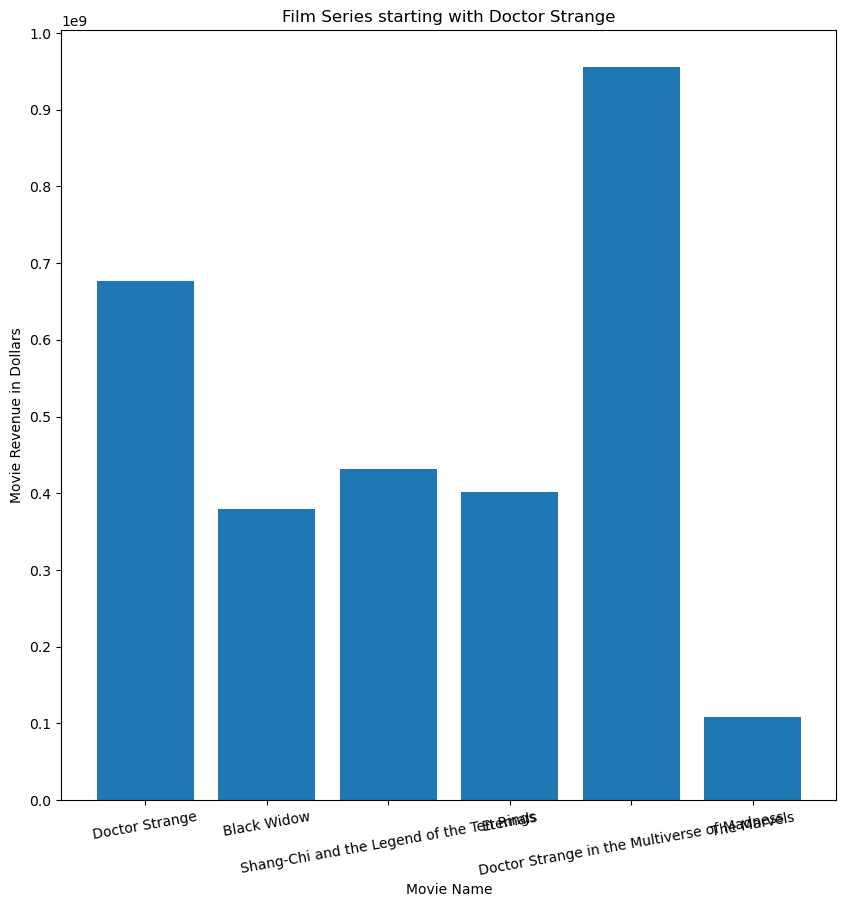

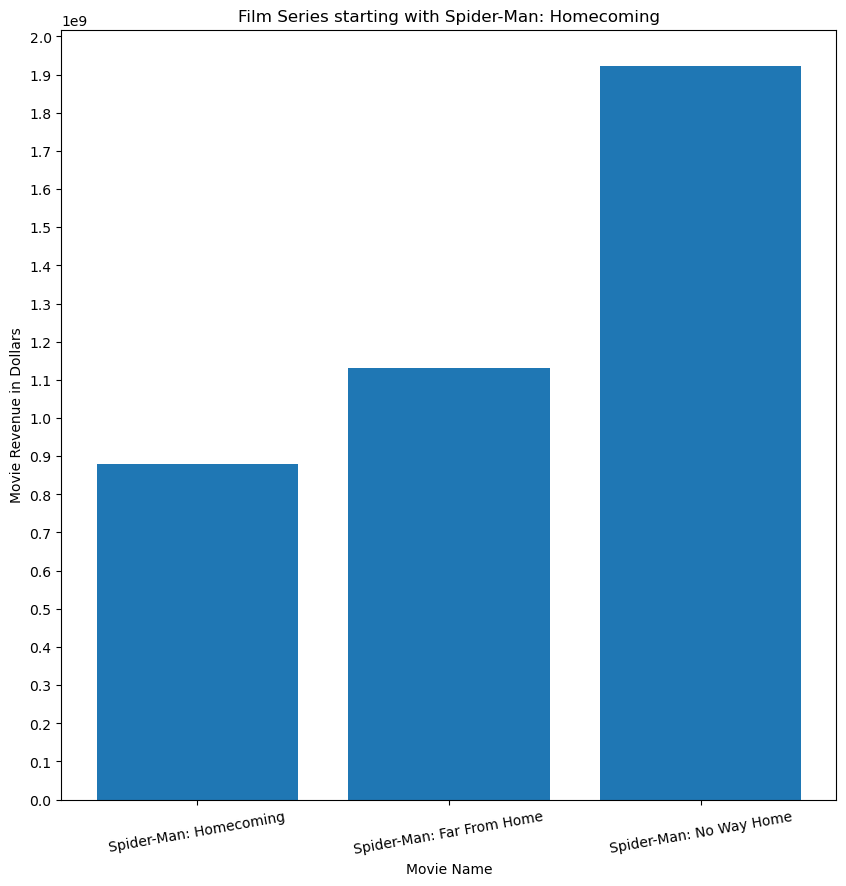

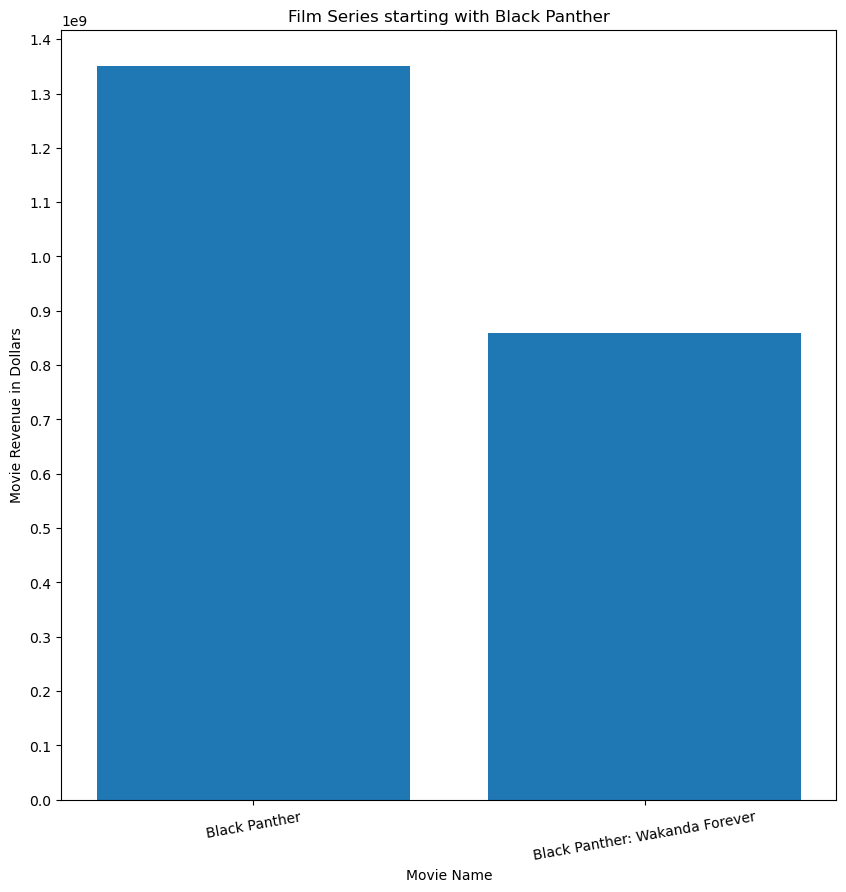

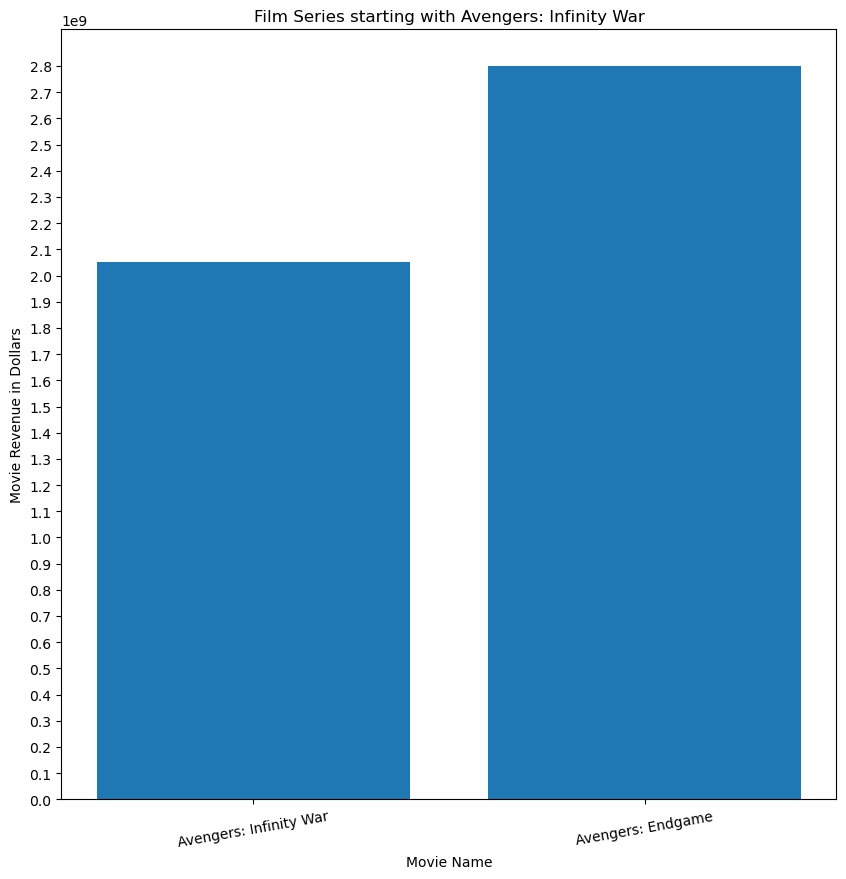

In [129]:
# plotting the film series revenue over time for each cluster showing as a bar plot

for film_series in film_series_sorted:
    film_series_name = 'Film Series ' + str(film_series)
    film_series_revenue = film_series_sorted[film_series]
    
    # extracting the movie names and revenues
    movie_names = [movie[0] for movie in film_series_revenue]
    movie_revenues = [movie[1] for movie in film_series_revenue]
    
    first_movie_name = movie_names[0]
    # plotting the bar plot
    plt.figure(figsize=(10, 10))
    plt.bar(movie_names, movie_revenues)
    plt.title(f"Film Series starting with {first_movie_name}")
    plt.xlabel('Movie Name')
    plt.ylabel('Movie Revenue in Dollars')
    plt.yticks(np.arange(0, max(movie_revenues) + 100000000, 100000000))
    plt.xticks(rotation=10)
    plt.savefig(PLOT_FOLDER + "/film_series_" + first_movie_name.lower().replace(" ", "_").replace(":", "") + ".png")
    plt.show()